In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv( '../../raw_data/cars.csv', index_col='Unnamed: 0')
df

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34
10,11,17


In [7]:
x_data = df['speed']
y_data = df['dist']

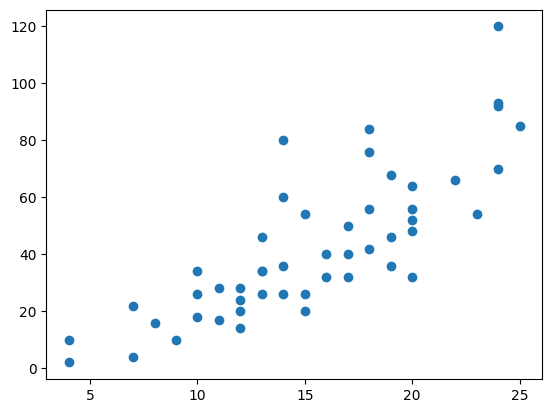

In [8]:
plt.scatter( x_data, y_data)
plt.show()

In [9]:
df.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


In [ ]:
"""
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
"""

In [10]:
x= tf.constant( x_data, tf.float32)
y= tf.constant( y_data, tf.float32)

Metal device set to: 

2022-11-30 20:19:48.437637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-30 20:19:48.438195: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [11]:
w = tf.Variable(  tf.random.uniform([1]) )
b = tf.Variable(  tf.random.uniform([1]) )

In [12]:
def cost():
    hx = w*x + b
    c = tf.reduce_mean( (hx-y)**2)
    return c

In [13]:
optimizer = Adam( learning_rate=0.01 )
hist_cost=[]
for i in range( 2000):
    optimizer.minimize( cost, var_list=[w,b] )
    c = cost().numpy()
    hist_cost.append( c )
    print( i, 'cost=', c )

0 cost= 1945.7338
1 cost= 1931.6687
2 cost= 1917.666
3 cost= 1903.7262
4 cost= 1889.8506
5 cost= 1876.0397
6 cost= 1862.2942
7 cost= 1848.6156
8 cost= 1835.0046
9 cost= 1821.4622
10 cost= 1807.9889
11 cost= 1794.5857
12 cost= 1781.2534
13 cost= 1767.9924
14 cost= 1754.8041
15 cost= 1741.6884
16 cost= 1728.6462
17 cost= 1715.6782
18 cost= 1702.7848
19 cost= 1689.9663
20 cost= 1677.2239
21 cost= 1664.5573
22 cost= 1651.9673
23 cost= 1639.454
24 cost= 1627.0181
25 cost= 1614.6593
26 cost= 1602.3783
27 cost= 1590.1758
28 cost= 1578.0505
29 cost= 1566.004
30 cost= 1554.036
31 cost= 1542.1465
32 cost= 1530.3356
33 cost= 1518.6034
34 cost= 1506.95
35 cost= 1495.3752
36 cost= 1483.879
37 cost= 1472.4617
38 cost= 1461.1228
39 cost= 1449.8624
40 cost= 1438.6804
41 cost= 1427.577
42 cost= 1416.5516
43 cost= 1405.6044
44 cost= 1394.7349
45 cost= 1383.943
46 cost= 1373.2285
47 cost= 1362.5916
48 cost= 1352.0315
49 cost= 1341.5487
50 cost= 1331.1422
51 cost= 1320.8121
52 cost= 1310.5582
53 cost= 130

In [14]:
w.numpy()

array([2.9725976], dtype=float32)

In [15]:
b.numpy()

array([-1.1981893], dtype=float32)

In [16]:
def hxFn( xdata ):
    hx = w*xdata + b
    return hx.numpy()

In [17]:
hxFn( 10 )

array([28.527786], dtype=float32)

In [18]:
# 자동차속도 4, 7 인경우 예측값을 구하시요.
hxFn( [4,7] )

array([10.692202, 19.609995], dtype=float32)

In [19]:
pred = hxFn( x )
pred

array([10.692202, 10.692202, 19.609995, 19.609995, 22.582592, 25.55519 ,
       28.527786, 28.527786, 28.527786, 31.500385, 31.500385, 34.472984,
       34.472984, 34.472984, 34.472984, 37.44558 , 37.44558 , 37.44558 ,
       37.44558 , 40.41818 , 40.41818 , 40.41818 , 40.41818 , 43.390774,
       43.390774, 43.390774, 46.363373, 46.363373, 49.33597 , 49.33597 ,
       49.33597 , 52.308567, 52.308567, 52.308567, 52.308567, 55.281166,
       55.281166, 55.281166, 58.25376 , 58.25376 , 58.25376 , 58.25376 ,
       58.25376 , 64.19896 , 67.171555, 70.14416 , 70.14416 , 70.14416 ,
       70.14416 , 73.11675 ], dtype=float32)

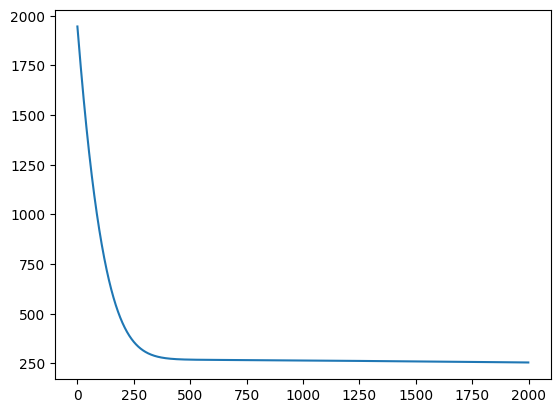

In [20]:
plt.plot(hist_cost)
plt.show()

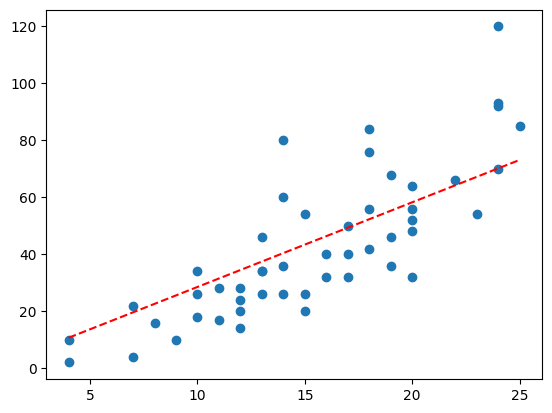

In [21]:
plt.scatter( x_data, y_data)
plt.plot( x_data, pred, 'r--')
plt.show()